___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split


from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

# plt.rcParams["font.sans-serif"] = "Arial"

plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [2]:
#!pip install -U scikit-learn

In [3]:
# %pip uninstall scikit-learn
# %pip install scikit-learn==1.3.0
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
df = pd.read_csv("Ready_to_ML.csv")

In [5]:
df.head()

make_model           make  \
0     Mercedes-Benz A 160  Mercedes-Benz   
1   Mercedes-Benz EQE 350  Mercedes-Benz   
2  Mercedes-Benz A 45 AMG  Mercedes-Benz   
3  Mercedes-Benz A 35 AMG  Mercedes-Benz   
4  Mercedes-Benz A 45 AMG  Mercedes-Benz   

                                            location    price body_type  \
0  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...  16950.0   Compact   
1       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES  80900.0   Compact   
2  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...  69900.0   Compact   
3  Carrer de Provença, 31 Local,  8029 BARCELONA, ES  46990.0   Compact   
4             CARRIL ARAGONES 4,  30007 CASILLAS, ES  16800.0   Compact   

             type warranty   mileage    gearbox fuel_type  seller  \
0            Used      Yes  120200.0     Manual    Diesel  Dealer   
1  Pre-registered      Yes    5000.0  Automatic  Electric  Dealer   
2            Used      Yes   18900.0  Automatic   Benzine  Dealer   
3            Used      Yes   18995.0  Automatic   Benzine  Dealer   
4            Used      Yes  197000.0  Automatic    Diesel  Dealer   

   engine_size  gears  co_emissions drivetrain  \
0       1595.0    5.0          98.0      Front   
1          1.0    1.0           0.0        4WD   
2       1991.0    8.0         162.0        4WD   
3       1991.0    7.0         169.0        4WD   
4       2143.0    7.0         162.0        4WD   

                                              extras  empty_weight  \
0                                       Alloy wheels        1270.0   
1  Alloy wheels (21"), Shift paddles, Sport packa...        2355.0   
2                                       Alloy wheels        1555.0   
3                                        Sport seats        1455.0   
4                                       Alloy wheels        1545.0   

  full_service_history         upholstery  previous_owner  \
0                   No              Cloth             2.0   
1                   No  Part/Full Leather             1.0   
2                   No  Part/Full Leather             2.0   
3                   No  Part/Full Leather             2.0   
4                   No  Part/Full Leather             2.0   

  energy_efficiency_class  age  power_kW  cons_avg  \
0               efficient  6.0      75.0     3.800   
1               efficient  0.0     215.0     2.359   
2             unefficient  2.0     310.0     8.400   
3             unefficient  2.0     225.0     7.300   
4             unefficient  7.0     100.0     4.900   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                       Premium                          Plus   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1       Safety Premium Package  
2  Safety Premium Plus Package  
3       Safety Premium Package  
4  Safety Premium Plus Package

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [7]:
df.describe()

price        mileage   engine_size         gears  co_emissions  \
count   26711.000000   26711.000000  26711.000000  26711.000000  26711.000000   
mean    23537.240538   68863.811928   1708.964696      5.820112    129.525841   
std     20811.986347   62794.146434    772.439713      1.416920     54.255203   
min       490.000000       0.000000      0.000000      1.000000      0.000000   
25%     12490.000000   19155.000000   1248.000000      5.000000    105.000000   
50%     18440.000000   54000.000000   1595.000000      6.000000    123.000000   
75%     28330.000000  100675.000000   1969.000000      6.000000    150.000000   
max    549000.000000  667128.000000   6300.000000      8.000000    399.000000   

       empty_weight  previous_owner           age      power_kW      cons_avg  
count  26711.000000    26711.000000  26711.000000  26711.000000  26711.000000  
mean    1425.205421        1.460073      5.166448    118.414380      5.531746  
std      307.386873        0.852665      4.654800     65.642485      2.220290  
min      347.000000        1.000000      0.000000     33.000000      0.000000  
25%     1228.000000        1.000000      2.000000     80.000000      4.300000  
50%     1375.000000        1.000000      4.000000    100.000000      5.200000  
75%     1597.000000        2.000000      7.000000    135.000000      6.400000  
max     3150.000000        9.000000     20.000000    450.000000     18.300000

Drop Duplicated Samples

In [8]:
df.duplicated().sum()

1815

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

Drop make_models with less than 100 counts 

In [11]:
make_model_count=df.make_model.value_counts()
make_model_count

# In order for ML models to learn a data well, the data should contain all the details as possible.
# When we look at the number of brand models, we see that the number of models of some brands is very low.
# In order for ML models to accurately predict car prices on a brand-by-model basis,
# there must be enough observations from each brand and model. For this, we exclude brand models under 100 from our data.

make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

In [12]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [13]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)
    
# We pull all the models in the model list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [14]:
df

make_model           make  \
0      Mercedes-Benz A 180  Mercedes-Benz   
1      Mercedes-Benz A 180  Mercedes-Benz   
2      Mercedes-Benz A 180  Mercedes-Benz   
3      Mercedes-Benz A 180  Mercedes-Benz   
4      Mercedes-Benz A 180  Mercedes-Benz   
...                    ...            ...   
18192            Volvo V40          Volvo   
18193            Volvo S60          Volvo   
18194            Volvo S90          Volvo   
18195            Volvo C30          Volvo   
18196            Volvo S90          Volvo   

                                                location    price body_type  \
0      Bestel gemakkelijk Online 24/7,  1000 Brussel, BE  24400.0   Compact   
1                     Zaackoer Weg 34,  15926 Luckau, DE   7450.0   Compact   
2                     Calle Carbón 19,  29603 MALAGA, ES  29800.0   Compact   
3                    RUA REAL 60,  36860 PONTEAEREAS, ES  21000.0   Compact   
4      Canal de Sant Jordi nº17 Pol. Ind. Son oms,  0...  26800.0   Compact   
...                                                  ...      ...       ...   
18192                                   1000 Brussel, BE  13000.0     Sedan   
18193             CALLE CATALUNYA, 37,  8520 LLERONA, ES   4999.0     Sedan   
18194           HERMANOS LUMIERE Nº16,  29004 MALAGA, ES  37600.0     Sedan   
18195             Sur rendez-vous,  5060 Sambreville, BE   7300.0     Sedan   
18196    Bergambachterstraat 5,  2871 JB SCHOONHOVEN, NL  29900.0     Sedan   

       type warranty   mileage    gearbox fuel_type          seller  \
0      Used      Yes   27150.0     Manual    Diesel          Dealer   
1      Used       No  157500.0     Manual    Diesel          Dealer   
2      Used      Yes   21734.0  Automatic    Diesel          Dealer   
3      Used      Yes  172700.0  Automatic    Diesel          Dealer   
4      Used      Yes   18989.0  Automatic    Diesel          Dealer   
...     ...      ...       ...        ...       ...             ...   
18192  Used       No  114000.0     Manual    Diesel  Private seller   
18193  Used      Yes  166512.0     Manual   Benzine          Dealer   
18194  Used      Yes   40345.0  Automatic    Diesel          Dealer   
18195  Used      Yes   96000.0     Manual    Diesel          Dealer   
18196  Used      Yes   94343.0  Automatic   Benzine          Dealer   

       engine_size  gears  co_emissions drivetrain  \
0           1461.0    6.0         120.0      Front   
1           1991.0    6.0         138.0      Front   
2           1461.0    7.0          99.5      Front   
3           1461.0    7.0          99.5      Front   
4           1461.0    7.0          99.5      Front   
...            ...    ...           ...        ...   
18192       1969.0    6.0          94.0      Front   
18193       2521.0    5.0         145.0      Front   
18194       1969.0    8.0         127.0        4WD   
18195       1560.0    6.0          99.0      Front   
18196       1969.0    8.0         149.0        4WD   

                                                  extras  empty_weight  \
0      Alloy wheels, Automatically dimming interior m...        1330.0   
1      Alloy wheels, Automatically dimming interior m...        1295.0   
2                                            Sport seats        1445.0   
3                                            Sport seats        1425.0   
4                                            Sport seats        1455.0   
...                                                  ...           ...   
18192  All season tyres, Ambient lighting, Cargo barr...        1532.0   
18193                                       Alloy wheels        1550.0   
18194                                       Alloy wheels        2077.0   
18195  Alloy wheels, Automatically dimming interior m...        1356.0   
18196  Alloy wheels (18"), Automatically dimming inte...        1617.0   

      full_service_history         upholstery  previous_owner  \
0                       No  Part/Full Leather             2.0   
1    

In [15]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

make_model
Renault Megane         825
SEAT Leon              757
Dacia Sandero          721
Hyundai i30            699
Opel Astra             634
Ford Mustang           572
Peugeot 308            536
Nissan Qashqai         484
Ford Focus             483
SEAT Ibiza             433
Volvo V40              430
Fiat Tipo              415
Fiat 500               413
Renault Clio           404
Ford Fiesta            392
Nissan Micra           380
Fiat 500X              373
Skoda Octavia          359
Opel Corsa             358
Dacia Duster           343
Toyota Yaris           323
Opel Insignia          290
Volvo C70              281
Peugeot 208            260
Skoda Fabia            246
Fiat 500C              238
Toyota Auris           231
Peugeot RCZ            220
Hyundai TUCSON         216
Peugeot 3008           215
Ford Kuga              208
Dacia Logan            197
Peugeot 508            194
Volvo XC60             192
Toyota Corolla         190
Skoda Superb           189
Skoda Scala      

In [16]:
len(df.make_model.value_counts())

70

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [17]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [18]:
df.head(2)

make_model    price body_type  type warranty   mileage gearbox  \
0  Mercedes-Benz A 180  24400.0   Compact  Used      Yes   27150.0  Manual   
1  Mercedes-Benz A 180   7450.0   Compact  Used       No  157500.0  Manual   

  fuel_type  seller  engine_size  gears  co_emissions drivetrain  \
0    Diesel  Dealer       1461.0    6.0         120.0      Front   
1    Diesel  Dealer       1991.0    6.0         138.0      Front   

                                              extras  empty_weight  \
0  Alloy wheels, Automatically dimming interior m...        1330.0   
1  Alloy wheels, Automatically dimming interior m...        1295.0   

  full_service_history         upholstery  previous_owner  \
0                   No  Part/Full Leather             2.0   
1                  Yes              Cloth             2.0   

  energy_efficiency_class   age  power_kW  cons_avg  \
0             unefficient   2.0      85.0       4.5   
1             unefficient  12.0      80.0       5.2   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package

In [19]:
df_object = df.select_dtypes(include ="object").head()
df_object

# # select_dtypes(include ="object") method to filter only object type features 

make_model body_type  type warranty    gearbox fuel_type  seller  \
0  Mercedes-Benz A 180   Compact  Used      Yes     Manual    Diesel  Dealer   
1  Mercedes-Benz A 180   Compact  Used       No     Manual    Diesel  Dealer   
2  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   
3  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   
4  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   

  drivetrain                                             extras  \
0      Front  Alloy wheels, Automatically dimming interior m...   
1      Front  Alloy wheels, Automatically dimming interior m...   
2      Front                                        Sport seats   
3      Front                                        Sport seats   
4      Front                                        Sport seats   

  full_service_history         upholstery energy_efficiency_class  \
0                   No  Part/Full Leather             unefficient   
1                  Yes              Cloth             unefficient   
2                   No              Cloth             unefficient   
3                   No              Cloth             unefficient   
4                   No              Cloth             unefficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package  
2       Safety Premium Package  
3      Safety Standard Package  
4       Safety Premium Package

## multicollinearity control

In [20]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 70
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6478
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


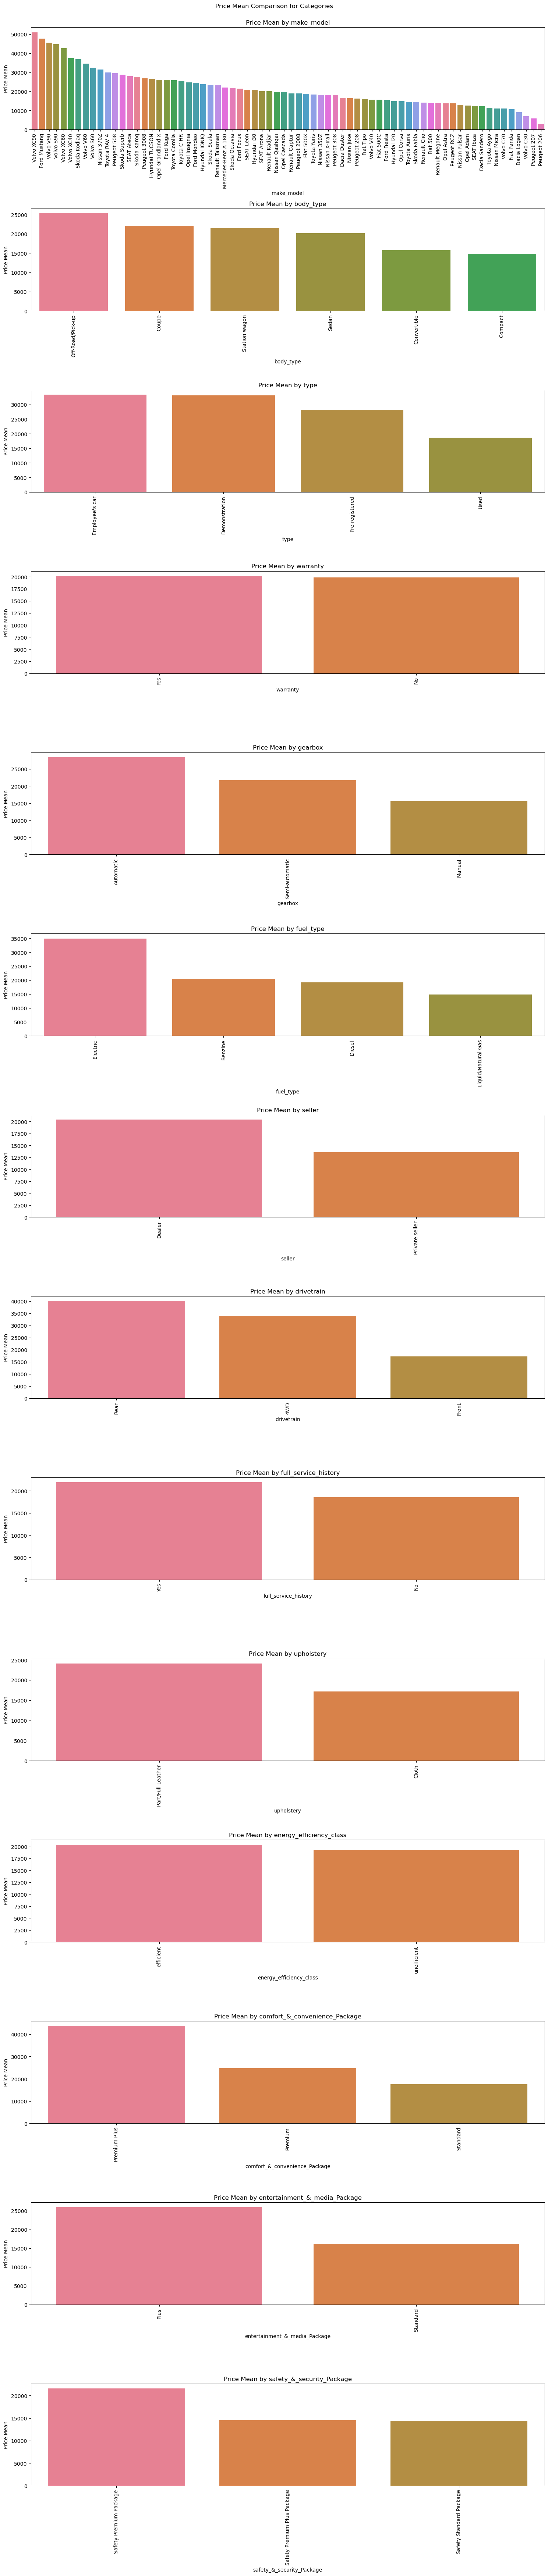

In [21]:
top_categories = 70

category_means = {}
for column in df.columns:
    if df[column].nunique() <= top_categories and df[column].dtype == 'object':
        category_means[column] = df.groupby(column)['price'].mean().sort_values(ascending=False)
        
palette = sns.color_palette("husl", len(category_means))

num_rows = len(category_means)
fig, axes = plt.subplots(num_rows, 1, figsize=(15, 5 * num_rows))
fig.suptitle('Price Mean Comparison for Categories', y=1.0)

for i, (column, means) in enumerate(category_means.items()):
    sns.barplot(x=means.index, y=means.values, ax=axes[i], palette = palette)
    axes[i].set_title(f'Price Mean by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price Mean')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Converting the Extras feature from object to numeric

In [22]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feature.

In [23]:
df.head() # check extras feature turned into numeric

make_model    price body_type  type warranty   mileage    gearbox  \
0  Mercedes-Benz A 180  24400.0   Compact  Used      Yes   27150.0     Manual   
1  Mercedes-Benz A 180   7450.0   Compact  Used       No  157500.0     Manual   
2  Mercedes-Benz A 180  29800.0   Compact  Used      Yes   21734.0  Automatic   
3  Mercedes-Benz A 180  21000.0   Compact  Used      Yes  172700.0  Automatic   
4  Mercedes-Benz A 180  26800.0   Compact  Used      Yes   18989.0  Automatic   

  fuel_type  seller  engine_size  gears  co_emissions drivetrain  extras  \
0    Diesel  Dealer       1461.0    6.0         120.0      Front       5   
1    Diesel  Dealer       1991.0    6.0         138.0      Front       6   
2    Diesel  Dealer       1461.0    7.0          99.5      Front       1   
3    Diesel  Dealer       1461.0    7.0          99.5      Front       1   
4    Diesel  Dealer       1461.0    7.0          99.5      Front       1   

   empty_weight full_service_history         upholstery  previous_owner  \
0        1330.0                   No  Part/Full Leather             2.0   
1        1295.0                  Yes              Cloth             2.0   
2        1445.0                   No              Cloth             2.0   
3        1425.0                   No              Cloth             3.0   
4        1455.0                   No              Cloth             2.0   

  energy_efficiency_class   age  power_kW  cons_avg  \
0             unefficient   2.0      85.0       4.5   
1             unefficient  12.0      80.0       5.2   
2             unefficient   2.0      85.0       3.9   
3             unefficient   4.0      80.0       3.7   
4             unefficient   2.0      85.0       3.9   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package  
2       Safety Premium Package  
3      Safety Standard Package  
4       Safety Premium Package

In [24]:
df.extras.nunique()  # 6478 unique value --> reduced to 21 unique.

21

Categorical features to be converted

In [25]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

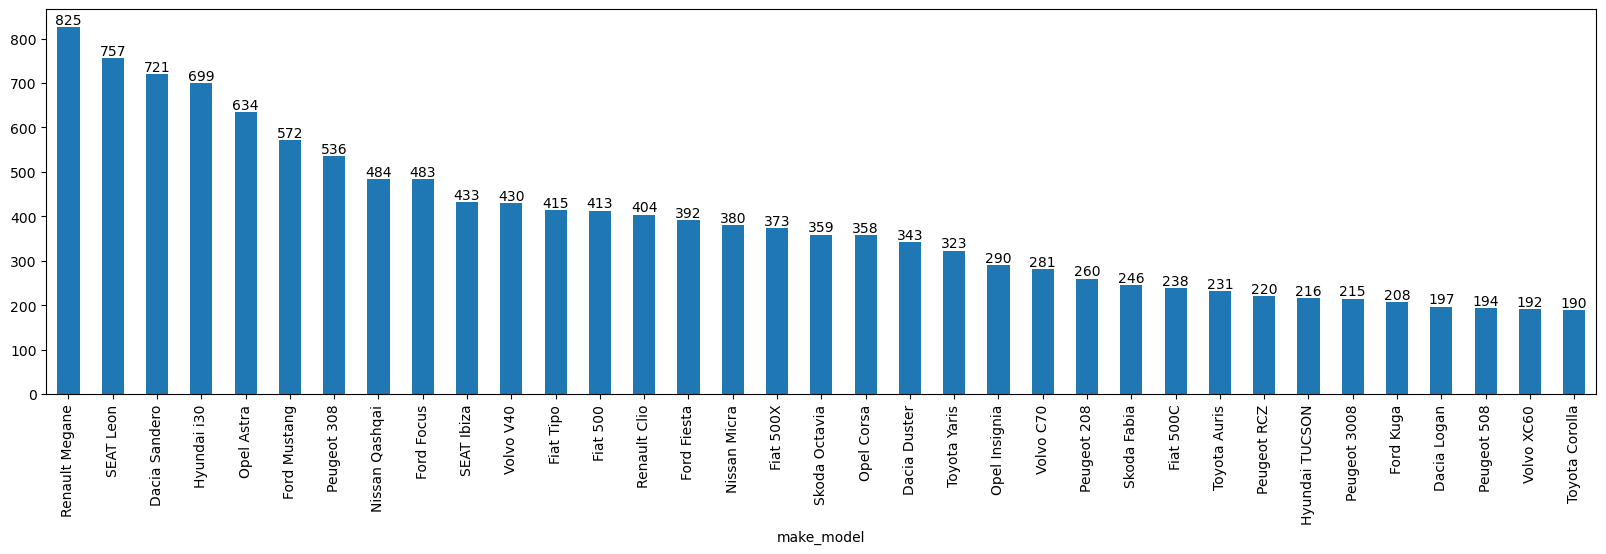

In [26]:
ax = df.make_model.value_counts().iloc[:35].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see the top 35 models with the most observations in our data and their numbers.

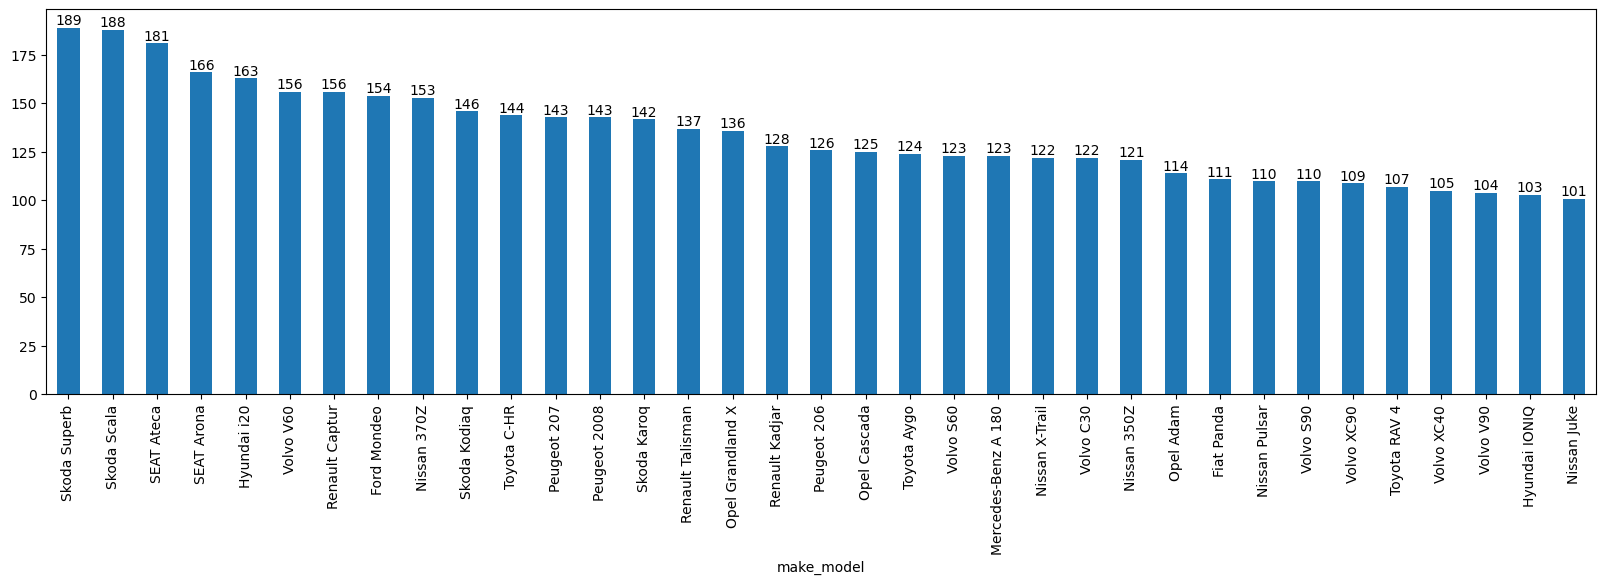

In [27]:
ax = df.make_model.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see 35 models and numbers with the least observations in our data.

In [28]:
df2 = df.copy()

Skewness for price :  2.473903804317343


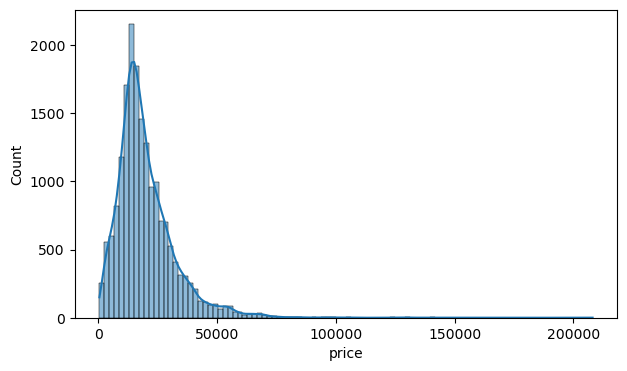

In [29]:
sns.histplot(df.price, bins=100, kde=True);
print("Skewness for price : ",skew(df.price))
# Also, looking at the histplot for all the data may mislead us about the outlier.
# For outlier detection, we should group the data in our data (Opel Astra, Ford Fiesta, Volvo S60 etc.)
# and determine the outlier accordingly.

In [30]:
skew(df.price)
# now distort the normal distribution
# We can say that the values between -0.5 and 0.5 perfectly fit the normal distribution, 
# the values between -1 and +1 fit the normal distribution well, 
# and the values smaller than -1 and greater than +1 now distort the normal distribution.

2.473903804317343

multicollinearity control

In [31]:
df_numeric=df.select_dtypes(include ="number")
df_numeric

price   mileage  engine_size  gears  co_emissions  extras  \
0      24400.0   27150.0       1461.0    6.0         120.0       5   
1       7450.0  157500.0       1991.0    6.0         138.0       6   
2      29800.0   21734.0       1461.0    7.0          99.5       1   
3      21000.0  172700.0       1461.0    7.0          99.5       1   
4      26800.0   18989.0       1461.0    7.0          99.5       1   
...        ...       ...          ...    ...           ...     ...   
18192  13000.0  114000.0       1969.0    6.0          94.0       9   
18193   4999.0  166512.0       2521.0    5.0         145.0       1   
18194  37600.0   40345.0       1969.0    8.0         127.0       1   
18195   7300.0   96000.0       1560.0    6.0          99.0       3   
18196  29900.0   94343.0       1969.0    8.0         149.0       2   

       empty_weight  previous_owner   age  power_kW  cons_avg  
0            1330.0             2.0   2.0      85.0       4.5  
1            1295.0             2.0  12.0      80.0       5.2  
2            1445.0             2.0   2.0      85.0       3.9  
3            1425.0             3.0   4.0      80.0       3.7  
4            1455.0             2.0   2.0      85.0       3.9  
...             ...             ...   ...       ...       ...  
18192        1532.0             1.0   4.0      88.0       3.6  
18193        1550.0             3.0  18.0     154.0       9.1  
18194        2077.0             2.0   3.0     288.0       2.0  
18195        1356.0             1.0  11.0      84.0       3.8  
18196        1617.0             1.0   5.0     187.0       6.5  

[18197 rows x 11 columns]

In [32]:
df_numeric.corr().iloc[1:, 1:]

mileage  engine_size     gears  co_emissions    extras  \
mileage         1.000000     0.096988 -0.075386      0.142708 -0.176425   
engine_size     0.096988     1.000000  0.104819      0.623381  0.150075   
gears          -0.075386     0.104819  1.000000      0.105622  0.188638   
co_emissions    0.142708     0.623381  0.105622      1.000000  0.066954   
extras         -0.176425     0.150075  0.188638      0.066954  1.000000   
empty_weight    0.011683     0.570256  0.375265      0.305501  0.323238   
previous_owner  0.359637     0.062210 -0.069685      0.116515 -0.092745   
age             0.742675     0.179708 -0.127089      0.331054 -0.181164   
power_kW       -0.096395     0.804989  0.274800      0.515299  0.282883   
cons_avg        0.111174     0.627165  0.082923      0.804786  0.087471   

                empty_weight  previous_owner       age  power_kW  cons_avg  
mileage             0.011683        0.359637  0.742675 -0.096395  0.111174  
engine_size         0.570256        0.062210  0.179708  0.804989  0.627165  
gears               0.375265       -0.069685 -0.127089  0.274800  0.082923  
co_emissions        0.305501        0.116515  0.331054  0.515299  0.804786  
extras              0.323238       -0.092745 -0.181164  0.282883  0.087471  
empty_weight        1.000000       -0.037641 -0.036816  0.676901  0.265832  
previous_owner     -0.037641        1.000000  0.446526 -0.021639  0.117748  
age                -0.036816        0.446526  1.000000 -0.032599  0.336580  
power_kW            0.676901       -0.021639 -0.032599  1.000000  0.553695  
cons_avg            0.265832        0.117748  0.336580  0.553695  1.000000

<Axes: >

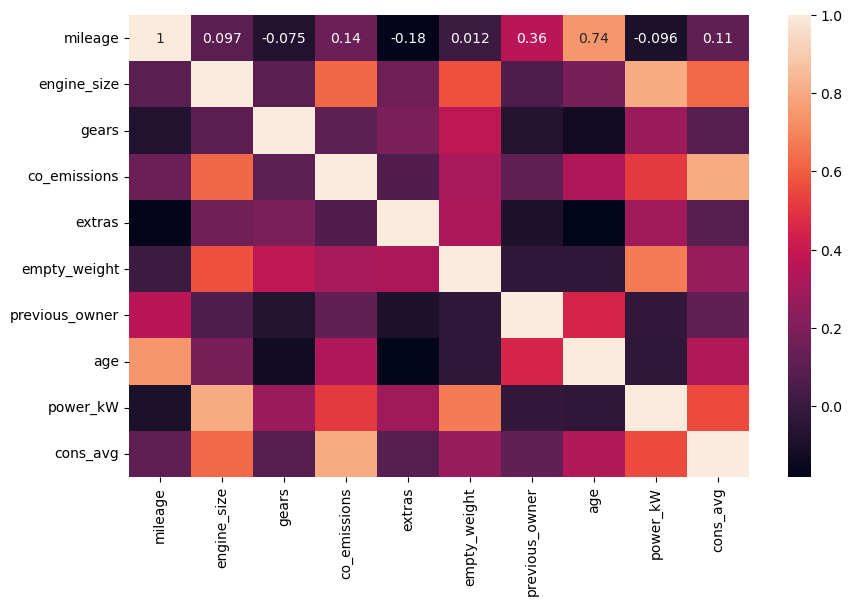

In [33]:
df_numeric = df.select_dtypes(include ="number")
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr().iloc[1:, 1:], annot =True)

# With the code select_dtypes(include ="number"), we can filter only the numeric features in the df.

In [34]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)]

price  mileage  engine_size  gears  co_emissions  extras  \
price             NaN      NaN          NaN    NaN           NaN     NaN   
mileage           NaN      NaN          NaN    NaN           NaN     NaN   
engine_size       NaN      NaN          NaN    NaN           NaN     NaN   
gears             NaN      NaN          NaN    NaN           NaN     NaN   
co_emissions      NaN      NaN          NaN    NaN           NaN     NaN   
extras            NaN      NaN          NaN    NaN           NaN     NaN   
empty_weight      NaN      NaN          NaN    NaN           NaN     NaN   
previous_owner    NaN      NaN          NaN    NaN           NaN     NaN   
age               NaN      NaN          NaN    NaN           NaN     NaN   
power_kW          NaN      NaN          NaN    NaN           NaN     NaN   
cons_avg          NaN      NaN          NaN    NaN           NaN     NaN   

                empty_weight  previous_owner  age  power_kW  cons_avg  
price                    NaN             NaN  NaN       NaN       NaN  
mileage                  NaN             NaN  NaN       NaN       NaN  
engine_size              NaN             NaN  NaN       NaN       NaN  
gears                    NaN             NaN  NaN       NaN       NaN  
co_emissions             NaN             NaN  NaN       NaN       NaN  
extras                   NaN             NaN  NaN       NaN       NaN  
empty_weight             NaN             NaN  NaN       NaN       NaN  
previous_owner           NaN             NaN  NaN       NaN       NaN  
age                      NaN             NaN  NaN       NaN       NaN  
power_kW                 NaN             NaN  NaN       NaN       NaN  
cons_avg                 NaN             NaN  NaN       NaN       NaN

In [35]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any()

price             False
mileage           False
engine_size       False
gears             False
co_emissions      False
extras            False
empty_weight      False
previous_owner    False
age               False
power_kW          False
cons_avg          False
dtype: bool

In [36]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this snippet.

False

VIF (Variance Inflation Factor) Score for Multicolliniearity¶

In [37]:
# conda install -c anaconda statsmodels
# !pip install statsmodels

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
X_vif = df_numeric.drop(columns='price')
X_vif.head()

mileage  engine_size  gears  co_emissions  extras  empty_weight  \
0   27150.0       1461.0    6.0         120.0       5        1330.0   
1  157500.0       1991.0    6.0         138.0       6        1295.0   
2   21734.0       1461.0    7.0          99.5       1        1445.0   
3  172700.0       1461.0    7.0          99.5       1        1425.0   
4   18989.0       1461.0    7.0          99.5       1        1455.0   

   previous_owner   age  power_kW  cons_avg  
0             2.0   2.0      85.0       4.5  
1             2.0  12.0      80.0       5.2  
2             2.0   2.0      85.0       3.9  
3             3.0   4.0      80.0       3.7  
4             2.0   2.0      85.0       3.9

In [40]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns

In [41]:
df_vif

features
0         mileage
1     engine_size
2           gears
3    co_emissions
4          extras
5    empty_weight
6  previous_owner
7             age
8        power_kW
9        cons_avg

In [42]:
X_vif.head()

mileage  engine_size  gears  co_emissions  extras  empty_weight  \
0   27150.0       1461.0    6.0         120.0       5        1330.0   
1  157500.0       1991.0    6.0         138.0       6        1295.0   
2   21734.0       1461.0    7.0          99.5       1        1445.0   
3  172700.0       1461.0    7.0          99.5       1        1425.0   
4   18989.0       1461.0    7.0          99.5       1        1455.0   

   previous_owner   age  power_kW  cons_avg  
0             2.0   2.0      85.0       4.5  
1             2.0  12.0      80.0       5.2  
2             2.0   2.0      85.0       3.9  
3             3.0   4.0      80.0       3.7  
4             2.0   2.0      85.0       3.9

In [43]:
variance_inflation_factor(X_vif.values, 0)

# Returns the VIF score of the relationship between the mileage feature at the 0th index of the "X_vif" and other features.

5.471118337441996

In [44]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [45]:
df_vif

#check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

# The features engine_size, gears, co_emissions, empty_weight, power_kW, and cons_avg have a serious multicollinearity 
# problem with other features. In this context, it is necessary to use one of the regularization models for accurate 
# feature selection.

features        VIF
0         mileage   5.471118
1     engine_size  25.196104
2           gears  21.675253
3    co_emissions  23.504770
4          extras   2.780753
5    empty_weight  38.757802
6  previous_owner   4.798746
7             age   6.879670
8        power_kW  17.867896
9        cons_avg  24.705654

Outliers in Price Column

<Axes: ylabel='price'>

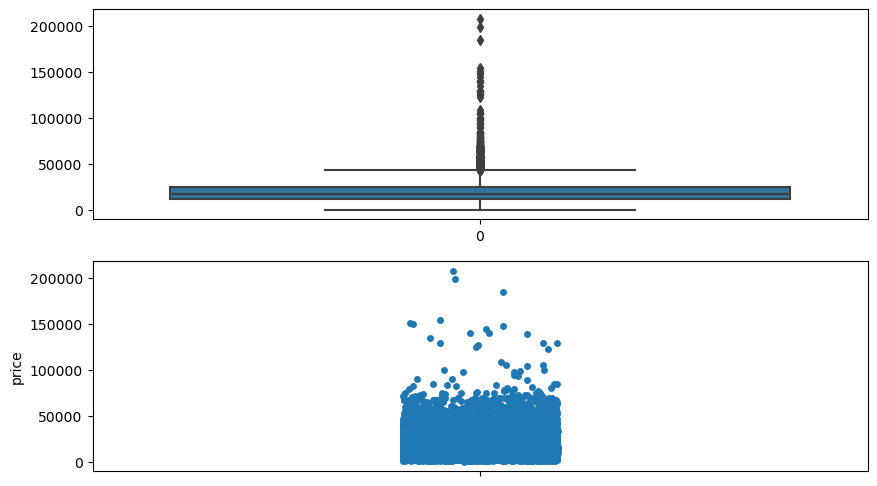

In [46]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price)

# We can get insights about outliers via boxplot. However, these insights can mislead us.
# In order to make more accurate comments, we can use the stripplot showing the distribution
# of categorical and numeric data. Although boxplot treats cars priced at 50 thousand EURO and above as outliers,
# stripplot tells us that the number of cars priced at 50 thousand EURO and around is not very few.
# But as we said above, our evaluation is not for the data in general. We will do it according to
# the groups in the data (Opel Astra, Ford Fiesta, Volvo S60 etc.).

Interact Plots

In [47]:
#conda install -c anaconda ipywidgets

In [48]:
df[df.make_model=="Volvo V60"]

make_model    price      body_type            type warranty   mileage  \
17606  Volvo V60  10990.0  Station wagon            Used       No  239760.0   
17607  Volvo V60  43900.0  Station wagon            Used       No   92700.0   
17610  Volvo V60  42960.0  Station wagon            Used       No   63054.0   
17611  Volvo V60  10900.0  Station wagon            Used       No  172000.0   
17612  Volvo V60  27490.0  Station wagon            Used      Yes   94358.0   
17614  Volvo V60  32990.0  Station wagon            Used       No   67500.0   
17615  Volvo V60  38990.0  Station wagon            Used       No   52147.0   
17616  Volvo V60  33920.0  Station wagon            Used       No   78211.0   
17617  Volvo V60  20350.0  Station wagon            Used       No   81398.0   
17618  Volvo V60  17990.0  Station wagon            Used      Yes  139803.0   
17619  Volvo V60  38990.0  Station wagon            Used       No   69000.0   
17621  Volvo V60  49940.0  Station wagon   Demonstration      Yes   21000.0   
17622  Volvo V60  33999.0  Station wagon            Used      Yes   28400.0   
17623  Volvo V60  26900.0  Station wagon            Used       No  105000.0   
17625  Volvo V60  46880.0  Station wagon            Used      Yes   21946.0   
17626  Volvo V60  47450.0  Station wagon            Used       No   16714.0   
17627  Volvo V60  31990.0  Station wagon            Used      Yes   95689.0   
17628  Volvo V60  35940.0  Station wagon            Used      Yes   89759.0   
17629  Volvo V60  26950.0  Station wagon            Used       No   46990.0   
17630  Volvo V60  44500.0  Station wagon            Used      Yes    8500.0   
17631  Volvo V60  53990.0  Station wagon   Demonstration      Yes   54034.0   
17633  Volvo V60  18990.0  Station wagon            Used       No  191900.0   
17634  Volvo V60  46980.0  Station wagon            Used      Yes   18846.0   
17635  Volvo V60  22990.0  Station wagon            Used      Yes  111332.0   
17636  Volvo V60  29775.0  Station wagon            Used       No  104900.0   
17637  Volvo V60  23700.0  Station wagon            Used       No   88600.0   
17638  Volvo V60  12250.0  Station wagon            Used      Yes  120752.0   
17641  Volvo V60  36400.0  Station wagon            Used       No   25600.0   
17643  Volvo V60  35960.0  Station wagon            Used      Yes   31588.0   
17644  Volvo V60  26500.0  Station wagon            Used      Yes   74871.0   
17645  Volvo V60  34960.0  Station wagon            Used      Yes   49445.0   
17646  Volvo V60  28330.0  Station wagon            Used       No   48438.0   
17652  Volvo V60  24700.0  Station wagon            Used       No   88600.0   
17653  Volvo V60  45660.0  Station wagon            Used      Yes   15197.0   
17654  Volvo V60  35440.0  Station wagon            Used      Yes   66864.0   
17655  Volvo V60  18990.0  Station wagon            Used      Yes  126603.0   
17657  Volvo V60  58889.0  Station wagon            Used       No   42000.0   
17659  Volvo V60  59780.0  Station wagon            Used       No    2287.0   
17663  Volvo V60   7890.0  Station wagon            Used      Yes  247015.0   
17664  Volvo V60  42450.0  Station wagon            Used      Yes   62914.0   
17666  Volvo V60  36400.0  Station wagon            Used      Yes   23300.0   
17668  Volvo V60  36500.0  Station wagon            Used      Yes   72200.0   
17669  Volvo V60  28990.0  Station wagon            Used      Yes   51662.0   
17671  Volvo V60  35960.0  Station wagon            Used      Yes   30246.0   
17673  Volvo V60  54890.0  Station wagon            Used       No   20394.0   
17676  Volvo V60  48900.0  Station wagon            Used       No    7727.0   
17678  Volvo V60  29950.0  Station wagon            Used       No  116550.0   
17681  Volvo V60  34770.0  Station wagon            Used      Yes   65546.0   
17682  Volvo V60  52900.0  Station wagon            Used      Yes   23434.0   
17684  Volvo V60  41999.0  Station wagon            Used

In [49]:
from ipywidgets import interact


In [50]:
def box_strip(model):
    sns.boxplot(data = df[df.make_model==model],
                x= "make_model",
                y= "price",
                color="yellow")
    
    sns.stripplot(data = df[df.make_model==model],
                x= "make_model",
                y= "price",
                color="blue")
model = df.make_model.unique()
interact(box_strip, model=model);

# This code defines the function to plot an interactive boxplot and stripplot using the ipywidgets and seaborn libraries.
# The function superimposes the boxplot and stripplot graph showing the prices of different car models covered by the data.
# The interact() function allows the box_strip function to run by selecting the user through the interface.
# This selection determines the car model that will be used to draw the graph.

interactive(children=(Dropdown(description='model', options=('Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra'…

Count and Rate of Outliers

In [51]:
df.make_model.unique()

# unique groups in our data

array(['Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra', 'Opel Adam',
       'Opel Insignia', 'Opel Cascada', 'Opel Grandland X',
       'Renault Megane', 'Renault Clio', 'Renault Captur',
       'Renault Talisman', 'Renault Kadjar', 'Peugeot 308', 'Peugeot 206',
       'Peugeot 208', 'Peugeot 207', 'Peugeot 3008', 'Peugeot 508',
       'Peugeot RCZ', 'Peugeot 2008', 'Fiat 500', 'Fiat Tipo',
       'Fiat 500X', 'Fiat Panda', 'Fiat 500C', 'SEAT Leon', 'SEAT Ibiza',
       'SEAT Arona', 'SEAT Ateca', 'Skoda Octavia', 'Skoda Scala',
       'Skoda Fabia', 'Skoda Superb', 'Skoda Kodiaq', 'Skoda Karoq',
       'Dacia Sandero', 'Dacia Logan', 'Dacia Duster', 'Toyota Yaris',
       'Toyota Aygo', 'Toyota Corolla', 'Toyota Auris', 'Toyota C-HR',
       'Toyota RAV 4', 'Nissan Micra', 'Nissan Qashqai', 'Nissan Juke',
       'Nissan Pulsar', 'Nissan 370Z', 'Nissan 350Z', 'Nissan X-Trail',
       'Ford Fiesta', 'Ford Focus', 'Ford Mondeo', 'Ford Kuga',
       'Ford Mustang', 'Hyundai i30', 'Hyund

In [52]:
df[df["make_model"]== "Mercedes-Benz A 180"]["price"]

# Prices of Mercedes-Benz A 180s. We will try to determine the outlier values for each car using this code.

0      24400.0
1       7450.0
2      29800.0
3      21000.0
4      26800.0
5      32900.0
6      21000.0
7      32950.0
8      18390.0
9      25900.0
10     25400.0
11     29900.0
12     14490.0
13     20630.0
14      8490.0
15     23850.0
16     29900.0
17     25900.0
18     16700.0
19     23850.0
20     27460.0
21     20630.0
22     21000.0
23     29900.0
24     25600.0
25     26850.0
26     25990.0
27     27800.0
28     29999.0
29     27900.0
30     27490.0
31     24780.0
32      9770.0
33     23850.0
34     31950.0
35     25000.0
36     14700.0
37      8950.0
38     10950.0
39     16750.0
40     12950.0
41     12445.0
42     14945.0
43     16950.0
44     19950.0
45      6400.0
46     13990.0
47     23990.0
48     16800.0
49     23990.0
50     27800.0
51     26850.0
52     31450.0
53     17944.0
54     23536.0
55     12245.0
56     27800.0
57     16945.0
58     26980.0
59     18945.0
60     22950.0
61     12295.0
62     27400.0
63     34950.0
64     35950.0
65     18750.0
66     152

In [53]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)].count()
    # Returns the total number of values that are below the lower limit and above the upper limit.
    
    rate_of_outliers = (count_of_outliers / len(df[df['make_model'] == model])).round(3)
    # We are finding the outlier rate for each make_model.
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<19} : {count_of_outliers:>2}, The rate of outliers : {rate_of_outliers}")
print() 

rate_of_total_outliers=(sum(total_outliers)/len(df)).round(3)
# The ratio of the total number of outliers for all make_models to the overall data

print(f"The Count of total outliers : {sum(total_outliers)}, The rate of total outliers : {rate_of_total_outliers}")

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

 The count of outlier for Mercedes-Benz A 180 :  0, The rate of outliers : 0.0
 The count of outlier for Opel Corsa          :  4, The rate of outliers : 0.011
 The count of outlier for Opel Astra          : 10, The rate of outliers : 0.016
 The count of outlier for Opel Adam           :  1, The rate of outliers : 0.009
 The count of outlier for Opel Insignia       : 19, The rate of outliers : 0.066
 The count of outlier for Opel Cascada        :  1, The rate of outliers : 0.008
 The count of outlier for Opel Grandland X    :  1, The rate of outliers : 0.007
 The count of outlier for Renault Megane      : 38, The rate of outliers : 0.046
 The count of outlier for Renault Clio        :  8, The rate of outliers : 0.02
 The count of outlier for Renault Captur      :  0, The rate of outliers : 0.0
 The count of outlier for Renault Talisman    :  5, The rate of outliers : 0.036
 The count of outlier for Renault Kadjar      :  7, The rate of outliers : 0.055
 The count of outlier for Peugeot

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

## OneHotEncoder

### Example

In [54]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [55]:
data = {"feature": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], 
        "target": [1,2,3,4,5,6,7,8,9,10]}

data = pd.DataFrame(data)
data

feature  target
0     bad       1
1   worst       2
2    good       3
3    good       4
4     bad       5
5     bed       6
6    good       7
7    good       8
8     bad       9
9     car      10

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["feature"]], data["target"], test_size=0.3, random_state=5)

In [57]:
X_train

feature
4     bad
7    good
1   worst
0     bad
8     bad
6    good
3    good

In [58]:
X_test

feature
9     car
5     bed
2    good

In [59]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")


# OneHotEncoder converts categorical features into dummies 0 and 1 features. If we want our model to treat
# all unique values under the categorical feature equally, we convert our categorical data to 0 and 1 using
# the onehotencoder conversion algorithm. We could also use the get_dummies() function for this conversion,
# but since applying get_dummies() to all data and then separating the data into train and test sets will
# cause data leakege, categorical observations for the data we prepared for ML models dummies features must be
# done with the onehotencoder conversion algorithm.

# However, when converting to categorical data, the following should not be forgotten:
# if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.)
# among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.

# Conversion of categorical data to dummies features is done according to the unique categorical data in
# the train set where the fit operation is performed. With the handle_unknown = "ignore" parameter,
# all categorical data passed in the test set and not in the train set are converted to 0.
# The default for this parameter is handle_unknown = "error". If the handle_unknown parameter remains at
# its default value, the onehotencoder algorithm will fail for an observation that is in the test set but
# not in the train set.

# In sklearn 1.2 versions, with the set_output(transform="pandas") code,
# it transforms the outputs converted into array after conversion into a dataframe
# with the feature names of the data to which it is fitted.

In [60]:
enc.fit_transform(X_train)

# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made 
# according to the unique observations in the train set.
# he set_output(transform="pandas") code formats the new feature names as 
# (old feature name_unique observation name). --> feature_bad, feature_good, etc.

feature_bad  feature_good  feature_worst
4          1.0           0.0            0.0
7          0.0           1.0            0.0
1          0.0           0.0            1.0
0          1.0           0.0            0.0
8          1.0           0.0            0.0
6          0.0           1.0            0.0
3          0.0           1.0            0.0

In [61]:
enc.transform(X_test)

# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1,
# while the non-observations (car, bed) are converted to 0.

feature_bad  feature_good  feature_worst
9          0.0           0.0            0.0
5          0.0           0.0            0.0
2          0.0           1.0            0.0

## OrdinalEncoder

### Example

In [62]:
data = {"feature": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], 
        "target": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

feature  target
0     bad       1
1   worst       2
2    good       3
3    good       4
4     bad       5
5    good       6
6    good       7
7     bad       8
8    ugly       9
9   worst      10

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data[["feature"]], data["target"], test_size=0.3, random_state=101)

In [64]:
X_train

feature
4     bad
9   worst
3    good
5    good
7     bad
6    good
1   worst

In [65]:
X_test

feature
8    ugly
2    good
0     bad

In [66]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(handle_unknown="use_encoded_value", 
                       unknown_value=-1, 
                       categories= [categories]).set_output(transform="pandas")

# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

# Since there is a hierarchical order between unique observations, we will use ordinalencoder. However, ordinalencoder
# by default makes the transformations according to the order of the ASCII codes of the observations(i.e.,alphabetical order)
# If we do not interfere with the model, the model will make the following order: 'bad':0, 'good':1, 'worst':2. However, 
# since this order is wrong, we need to give the hierarchical order to the model manually. If we give the order as 
# ['worst','bad','good'] as here, the model will make the following transformation: 'worst':0, 'bad':1, 'good':2.

In [67]:
enc_2.fit_transform(X_train)
# After ordinalencoder, the feature name does not change, only the unique categorical data in the feature are 
# converted to numeric observations.

feature
4      1.0
9      0.0
3      2.0
5      2.0
7      1.0
6      2.0
1      0.0

In [68]:
enc_2.transform(X_test)

# ugly converted to -1

feature
8     -1.0
2      2.0
0      1.0

Train | Test Split

In [69]:
X= df.drop(columns="price")
y= df.price

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [71]:
df.select_dtypes(include="object").head(1)

make_model body_type  type warranty gearbox fuel_type  seller  \
0  Mercedes-Benz A 180   Compact  Used      Yes  Manual    Diesel  Dealer   

  drivetrain full_service_history         upholstery energy_efficiency_class  \
0      Front                   No  Part/Full Leather             unefficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   

  safety_&_security_Package  
0    Safety Premium Package

In [72]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [73]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", 
                                       sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(handle_unknown="use_encoded_value",
                                        unknown_value=-1,
                                        categories=[cat_for_type, 
                                                    cat_for_warranty,
                                                    cat_for_seller,
                                                    cat_for_service_history,
                                                    cat_for_upholstery,
                                                    cat_for_energy,
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the non-transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder__" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder__", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature_names_out=False.

In [74]:
X_train.head()

make_model      body_type  type warranty   mileage    gearbox  \
16734       Volvo V40        Compact  Used      Yes   98027.0  Automatic   
14781     Ford Mondeo  Station wagon  Used      Yes   17195.0  Automatic   
2414   Renault Megane          Coupe  Used       No  225000.0     Manual   
1430       Opel Astra          Sedan  Used       No   62807.0  Automatic   
1512        Opel Adam          Sedan  Used      Yes   60750.0     Manual   

      fuel_type          seller  engine_size  gears  co_emissions drivetrain  \
16734    Diesel          Dealer       1560.0    6.0          89.0      Front   
14781    Diesel          Dealer       1995.0    8.0         136.0        4WD   
2414    Benzine  Private seller       1998.0    6.0         178.0      Front   
1430    Benzine          Dealer       1364.0    8.0         157.0      Front   
1512    Benzine          Dealer       1398.0    5.0           0.0      Front   

       extras  empty_weight full_service_history         upholstery  \
16734       1        1472.0                   No  Part/Full Leather   
14781       7        1826.0                  Yes  Part/Full Leather   
2414        6        1395.0                   No  Part/Full Leather   
1430        4        1280.0                  Yes              Cloth   
1512        9        1120.0                  Yes              Cloth   

       previous_owner energy_efficiency_class   age  power_kW  cons_avg  \
16734             3.0               efficient   7.0      84.0       3.9   
14781             1.0               efficient   1.0     140.0       5.2   
2414              1.0               efficient  13.0     132.0       7.6   
1430              4.0               efficient   8.0     103.0       6.7   
1512              1.0             unefficient   3.0      74.0       0.0   

      comfort_&_convenience_Package entertainment_&_media_Package  \
16734                      Standard                      Standard   
14781                       Premium                          Plus   
2414                       Standard                      Standard   
1430                        Premium                      Standard   
1512                        Premium                          Plus   

      safety_&_security_Package  
16734    Safety Premium Package  
14781    Safety Premium Package  
2414     Safety Premium Package  
1430     Safety Premium Package  
1512     Safety Premium Package

In [75]:
X_test.head()

make_model         body_type  type warranty  mileage    gearbox  \
15071      Ford Focus             Sedan  Used      Yes  27532.0     Manual   
10999     Toyota Aygo           Compact  Used      Yes  31167.0     Manual   
14000    Ford Mustang       Convertible  Used       No  33800.0  Automatic   
15766  Hyundai TUCSON  Off-Road/Pick-up  Used      Yes  34850.0  Automatic   
4291     Peugeot 3008  Off-Road/Pick-up  Used       No  57430.0  Automatic   

      fuel_type          seller  engine_size  gears  co_emissions drivetrain  \
15071    Diesel          Dealer       1500.0    6.0         109.0      Front   
10999   Benzine          Dealer        998.0    5.0          93.0      Front   
14000   Benzine  Private seller       5083.0    6.0         273.0       Rear   
15766    Diesel          Dealer       1600.0    6.0         129.0      Front   
4291     Diesel          Dealer       1997.0    8.0         129.0      Front   

       extras  empty_weight full_service_history         upholstery  \
15071       8        1280.0                   No              Cloth   
10999       4         985.0                   No              Cloth   
14000       9        1893.0                  Yes  Part/Full Leather   
15766       1        1425.0                   No              Cloth   
4291       15        1555.0                  Yes  Part/Full Leather   

       previous_owner energy_efficiency_class  age  power_kW  cons_avg  \
15071             1.0               efficient  2.0      88.0      3.60   
10999             1.0               efficient  2.0      53.0      4.00   
14000             1.0             unefficient  4.0     310.0     12.50   
15766             1.0             unefficient  4.0     100.0      4.65   
4291              1.0               efficient  3.0     132.0      4.90   

      comfort_&_convenience_Package entertainment_&_media_Package  \
15071                       Premium                          Plus   
10999                      Standard                          Plus   
14000                      Standard                          Plus   
15766                      Standard                      Standard   
4291                        Premium                          Plus   

      safety_&_security_Package  
15071    Safety Premium Package  
10999    Safety Premium Package  
14000    Safety Premium Package  
15766    Safety Premium Package  
4291     Safety Premium Package

In [76]:
X_train.shape, X_test.shape

((14557, 24), (3640, 24))

In [77]:
column_trans.fit_transform(X_train)

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                      0.0                     0.0   
14781                      0.0                     0.0   
2414                       0.0                     0.0   
1430                       0.0                     0.0   
1512                       0.0                     0.0   
...                        ...                     ...   
11284                      0.0                     0.0   
11964                      0.0                     0.0   
5390                       0.0                     0.0   
860                        0.0                     0.0   
15795                      0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                       0.0                  0.0                   0.0   
14781                       0.0                  0.0                   0.0   
2414                        0.0                  0.0                   0.0   
1430                        0.0                  0.0                   0.0   
1512                        0.0                  0.0                   0.0   
...                         ...                  ...                   ...   
11284                       0.0                  0.0                   0.0   
11964                       0.0                  0.0                   0.0   
5390                        0.0                  0.0                   0.0   
860                         0.0                  0.0                   0.0   
15795                       0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                   0.0                    0.0                   0.0   
14781                   0.0                    0.0                   0.0   
2414                    0.0                    0.0                   0.0   
1430                    0.0                    0.0                   0.0   
1512                    0.0                    0.0                   0.0   
...                     ...                    ...                   ...   
11284                   0.0                    0.0                   0.0   
11964                   0.0                    0.0                   0.0   
5390                    0.0                    1.0                   0.0   
860                     0.0                    0.0                   0.0   
15795                   0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                     0.0                    0.0                   0.0   
14781                     0.0                    0.0                   0.0   
2414                      0.0                    0.0                   0.0   
1430                      0.0                    0.0                   0.0   
1512                      0.0                    0.0                   0.0   
...                       ...                    ...                   ...   
11284                     0.0                    0.0                   0.0   
11964                     0.0                    0.0                   0.0   
5390                      0.0                    0.0                   0.0   
860                       0.0                    0.0                   0.0   
15795                     0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                     0.0                      0.0   
14781                     1.0                      0.0   
2414                      0.0                      0.0   
1430                      0.0                      0.0   
1512                      0.0                      0.0   
...                       ...                      ...   
11284                     0.0                      0.0   
11964                     0.0                      0.0   
5

In [78]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [79]:
X_train_trans.shape, X_test_trans.shape

((14557, 105), (3640, 105))

In [80]:
X_train_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                      0.0                     0.0   
14781                      0.0                     0.0   
2414                       0.0                     0.0   
1430                       0.0                     0.0   
1512                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                       0.0                  0.0                   0.0   
14781                       0.0                  0.0                   0.0   
2414                        0.0                  0.0                   0.0   
1430                        0.0                  0.0                   0.0   
1512                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                   0.0                    0.0                   0.0   
14781                   0.0                    0.0                   0.0   
2414                    0.0                    0.0                   0.0   
1430                    0.0                    0.0                   0.0   
1512                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                     0.0                    0.0                   0.0   
14781                     0.0                    0.0                   0.0   
2414                      0.0                    0.0                   0.0   
1430                      0.0                    0.0                   0.0   
1512                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                     0.0                      0.0   
14781                     1.0                      0.0   
2414                      0.0                      0.0   
1430                      0.0                      0.0   
1512                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
16734                       0.0                        0.0   
14781                       0.0                        0.0   
2414                        0.0                        0.0   
1430                        0.0                        0.0   
1512                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
16734                             0.0                     0.0   
14781                             0.0                     0.0   
2414                              0.0                     0.0   
1430                              0.0                     0.0   
1512                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
16734                      0.0                       0.0   
14781                      0.0                       0.0   
2414                       0.0                       0.0   
1430                       0.0                       0.0   
1512                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
16734                        0.0        

In [81]:
X_test_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
15071                      0.0                     0.0   
10999                      0.0                     0.0   
14000                      0.0                     0.0   
15766                      0.0                     0.0   
4291                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
15071                       0.0                  0.0                   0.0   
10999                       0.0                  0.0                   0.0   
14000                       0.0                  0.0                   0.0   
15766                       0.0                  0.0                   0.0   
4291                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
15071                   0.0                    0.0                   0.0   
10999                   0.0                    0.0                   0.0   
14000                   0.0                    0.0                   0.0   
15766                   0.0                    0.0                   0.0   
4291                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
15071                     0.0                    1.0                   0.0   
10999                     0.0                    0.0                   0.0   
14000                     0.0                    0.0                   0.0   
15766                     0.0                    0.0                   0.0   
4291                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
15071                     0.0                      0.0   
10999                     0.0                      0.0   
14000                     0.0                      1.0   
15766                     0.0                      0.0   
4291                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
15071                       0.0                        0.0   
10999                       0.0                        0.0   
14000                       0.0                        0.0   
15766                       0.0                        1.0   
4291                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
15071                             0.0                     0.0   
10999                             0.0                     0.0   
14000                             0.0                     0.0   
15766                             0.0                     0.0   
4291                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
15071                      0.0                       0.0   
10999                      0.0                       0.0   
14000                      0.0                       0.0   
15766                      0.0                       0.0   
4291                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
15071                        0.0        

After Transformation, Correlations between Features

In [82]:
X_train_trans.join(y_train).corr()

# Let's see the relationships between Target and features.

make_model_Dacia Duster  \
make_model_Dacia Duster                        1.000000   
make_model_Dacia Logan                        -0.014201   
make_model_Dacia Sandero                      -0.027729   
make_model_Fiat 500                           -0.020825   
make_model_Fiat 500C                          -0.016067   
make_model_Fiat 500X                          -0.020054   
make_model_Fiat Panda                         -0.011264   
make_model_Fiat Tipo                          -0.021022   
make_model_Ford Fiesta                        -0.020792   
make_model_Ford Focus                         -0.022968   
make_model_Ford Kuga                          -0.015338   
make_model_Ford Mondeo                        -0.013072   
make_model_Ford Mustang                       -0.025390   
make_model_Hyundai IONIQ                      -0.010904   
make_model_Hyundai TUCSON                     -0.015072   
make_model_Hyundai i20                        -0.013325   
make_model_Hyundai i30                        -0.027420   
make_model_Mercedes-Benz A 180                -0.011264   
make_model_Nissan 350Z                        -0.011264   
make_model_Nissan 370Z                        -0.012282   
make_model_Nissan Juke                        -0.010532   
make_model_Nissan Micra                       -0.020020   
make_model_Nissan Pulsar                      -0.011145   
make_model_Nissan Qashqai                     -0.023148   
make_model_Nissan X-Trail                     -0.011498   
make_model_Opel Adam                          -0.011145   
make_model_Opel Astra                         -0.026582   
make_model_Opel Cascada                       -0.011840   
make_model_Opel Corsa                         -0.019466   
make_model_Opel Grandland X                   -0.011784   
make_model_Opel Insignia                      -0.017478   
make_model_Peugeot 2008                       -0.012228   
make_model_Peugeot 206                        -0.011840   
make_model_Peugeot 207                        -0.012814   
make_model_Peugeot 208                        -0.016523   
make_model_Peugeot 3008                       -0.014938   
make_model_Peugeot 308                        -0.024148   
make_model_Peugeot 508                        -0.013963   
make_model_Peugeot RCZ                        -0.014938   
make_model_Renault Captur                     -0.013123   
make_model_Renault Clio                       -0.020627   
make_model_Renault Kadjar                     -0.011784   
make_model_Renault Megane                     -0.030056   
make_model_Renault Talisman                   -0.012228   
make_model_SEAT Arona                         -0.013072   
make_model_SEAT Ateca                         -0.013915   
make_model_SEAT Ibiza                         -0.021282   
make_model_SEAT Leon                          -0.028464   
make_model_Skoda Fabia                        -0.016109   
make_model_Skoda Karoq                        -0.012118   
make_model_Skoda Kodiaq                       -0.012336   
make_model_Skoda Octavia                      -0.019745   
make_model_Skoda Scala                        -0.014059   
make_model_Skoda Superb                       -0.014528   
make_model_Toyota Auris                       -0.015425   
make_model_Toyota Aygo                        -0.010843   
make_model_Toyota C-HR                        -0.012228   
make_model_Toyota Corolla                     -0.013623   
make_model_Toyota RAV 4                       -0.010405   
make_model_Toyota Yaris                       -0.018825   
make_model_Volvo C30                          -0.011440   
make_model_Volvo C70                          -0.017555   
make_model_Volvo S60                          -0.011498   
make_model_Volvo S90                          -0.010595   
make_model_Volvo V40                          -0.021347   
make_model_Volvo V60                          -0.012604   
make_model_Volvo V90                          -0.010720   
make_model_Volvo XC4

In [83]:
# conda install -c conda-forge plotly

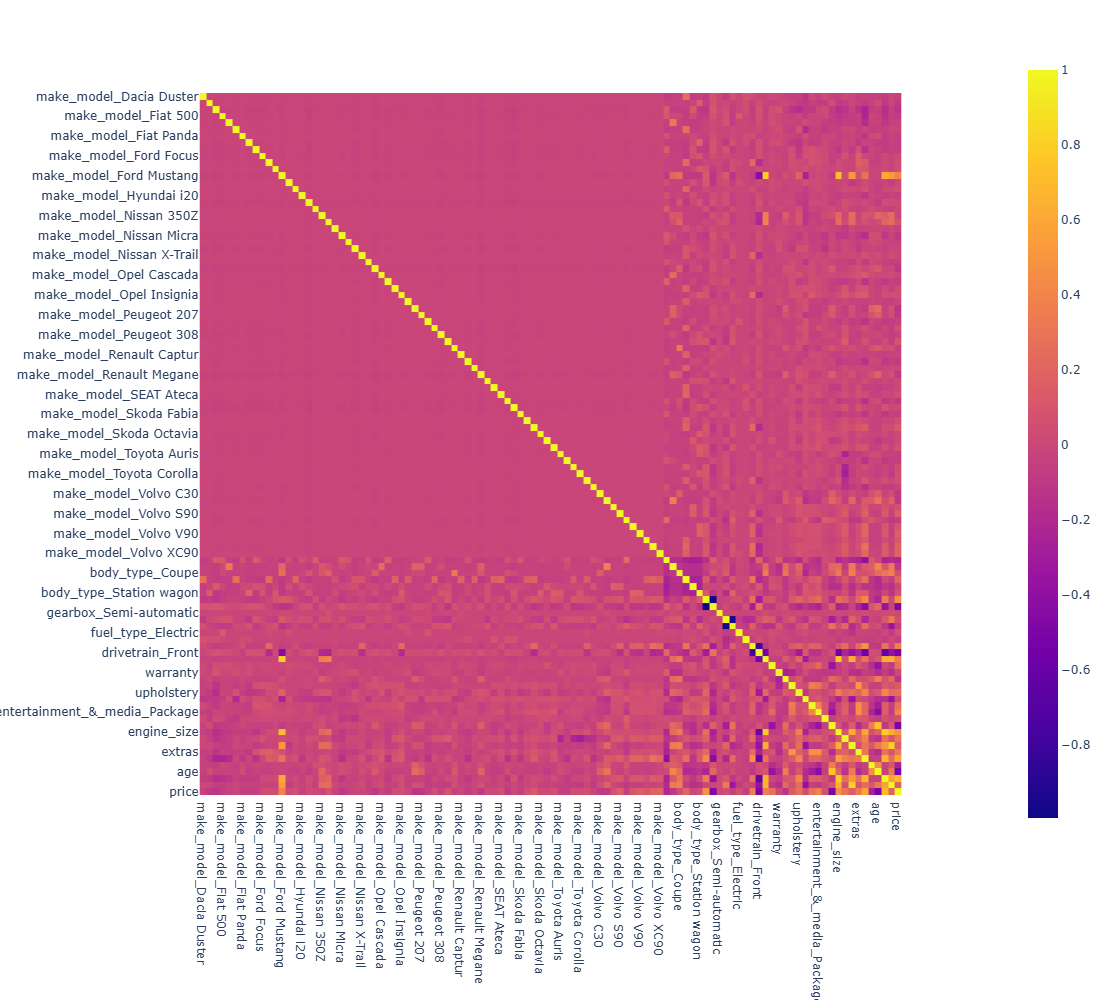

In [84]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show();

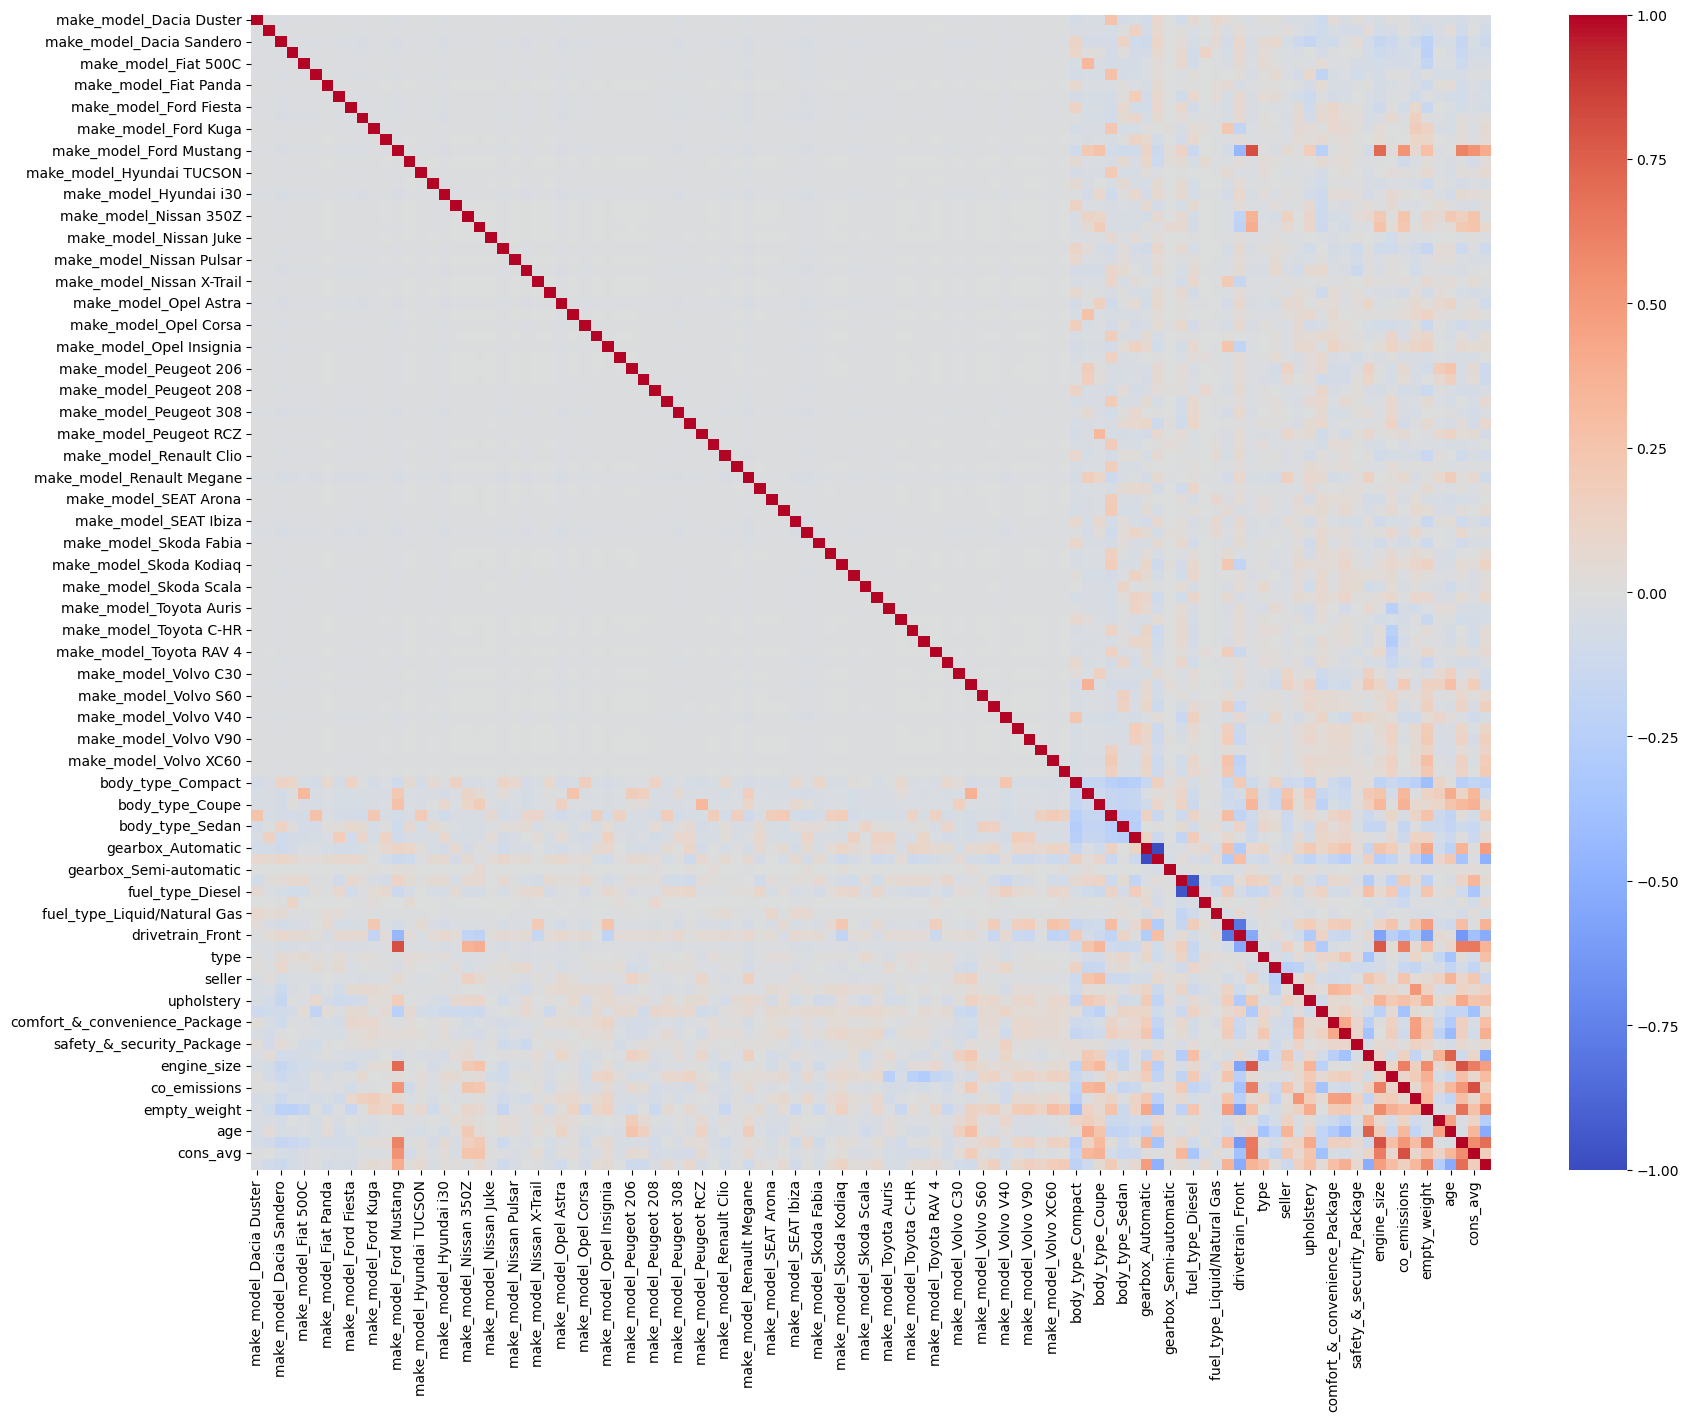

In [85]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

## Scaling

In [86]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [87]:
X_train_scaled.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                      0.0                     0.0   
14781                      0.0                     0.0   
2414                       0.0                     0.0   
1430                       0.0                     0.0   
1512                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                       0.0                  0.0                   0.0   
14781                       0.0                  0.0                   0.0   
2414                        0.0                  0.0                   0.0   
1430                        0.0                  0.0                   0.0   
1512                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                   0.0                    0.0                   0.0   
14781                   0.0                    0.0                   0.0   
2414                    0.0                    0.0                   0.0   
1430                    0.0                    0.0                   0.0   
1512                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                     0.0                    0.0                   0.0   
14781                     0.0                    0.0                   0.0   
2414                      0.0                    0.0                   0.0   
1430                      0.0                    0.0                   0.0   
1512                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                     0.0                      0.0   
14781                     1.0                      0.0   
2414                      0.0                      0.0   
1430                      0.0                      0.0   
1512                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
16734                       0.0                        0.0   
14781                       0.0                        0.0   
2414                        0.0                        0.0   
1430                        0.0                        0.0   
1512                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
16734                             0.0                     0.0   
14781                             0.0                     0.0   
2414                              0.0                     0.0   
1430                              0.0                     0.0   
1512                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
16734                      0.0                       0.0   
14781                      0.0                       0.0   
2414                       0.0                       0.0   
1430                       0.0                       0.0   
1512                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
16734                        0.0        

In [88]:
X_test_scaled.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
15071                      0.0                     0.0   
10999                      0.0                     0.0   
14000                      0.0                     0.0   
15766                      0.0                     0.0   
4291                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
15071                       0.0                  0.0                   0.0   
10999                       0.0                  0.0                   0.0   
14000                       0.0                  0.0                   0.0   
15766                       0.0                  0.0                   0.0   
4291                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
15071                   0.0                    0.0                   0.0   
10999                   0.0                    0.0                   0.0   
14000                   0.0                    0.0                   0.0   
15766                   0.0                    0.0                   0.0   
4291                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
15071                     0.0                    1.0                   0.0   
10999                     0.0                    0.0                   0.0   
14000                     0.0                    0.0                   0.0   
15766                     0.0                    0.0                   0.0   
4291                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
15071                     0.0                      0.0   
10999                     0.0                      0.0   
14000                     0.0                      1.0   
15766                     0.0                      0.0   
4291                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
15071                       0.0                        0.0   
10999                       0.0                        0.0   
14000                       0.0                        0.0   
15766                       0.0                        1.0   
4291                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
15071                             0.0                     0.0   
10999                             0.0                     0.0   
14000                             0.0                     0.0   
15766                             0.0                     0.0   
4291                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
15071                      0.0                       0.0   
10999                      0.0                       0.0   
14000                      0.0                       0.0   
15766                      0.0                       0.0   
4291                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
15071                        0.0        

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [89]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [90]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [91]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train          test
R2    8.314381e-01  8.304355e-01
mae   2.853543e+03  2.819758e+03
mse   2.709967e+07  2.456843e+07
rmse  5.205735e+03  4.956655e+03

In [92]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.831        0.830
mae      2853.543     2819.758
mse  27099673.935 24568429.988
rmse     5205.735     4956.655

Adjusted R2 Score

In [93]:
def adj_r2(actual, prediction, X):
    r2 = r2_score(actual, prediction)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

In [94]:
y_pred = lm.predict(X_test_scaled)
y_train_pred=lm.predict(X_train_scaled)

# We take our predictions (y_pred, y_train_pred) from the model to use in the function we defined above.

In [95]:
print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test_scaled))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train_scaled))

# We obtain our score by giving the necessary parameters to the function.

test adj_R2 score  : 0.8253975567709071
train adj_R2 score : 0.8302133546405412


Adjusted R2 Score

In [ ]:
def adj_r2(actual, prediction, X):
    r2 = r2_score(actual, prediction)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

In [ ]:
y_pred = lm.predict(X_test_scaled)
y_train_pred=lm.predict(X_train_scaled)

# We take our predictions (y_pred, y_train_pred) from the model to use in the function we defined above.

In [ ]:
print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test_scaled))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train_scaled))

# We obtain our score by giving the necessary parameters to the function.

## Cross Validate

In [96]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import get_scorer_names
get_scorer_names()

In [97]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True) # return_indices=True (for sklearn >= 1.3)
                                


# As we learned in our previous lessons, we perform the overfiting control by comparing the train and
# validation scores we receive through cross validaition.

# return_indices=True, returns the index numbers of the train and validation data in each iteration

In [98]:
scores
# The scores are returned as a dictionary.

{'fit_time': array([0.05803132, 0.0525043 , 0.0495739 , 0.049999  , 0.05751634,
        0.04953647, 0.05099893, 0.05753016, 0.05552173, 0.05799842]),
 'score_time': array([0.00404286, 0.00400043, 0.00400162, 0.00600243, 0.00399923,
        0.00499988, 0.00499988, 0.00400186, 0.00500083, 0.00600362]),
 'test_r2': array([0.86329948, 0.85129632, 0.84090787, 0.84615903, 0.84439441,
        0.83106558, 0.79102081, 0.84769834, 0.78978776, 0.80917312]),
 'train_r2': array([0.82764554, 0.82944438, 0.83041203, 0.82990899, 0.83000082,
        0.83127066, 0.8365255 , 0.82974981, 0.83741667, 0.83377985]),
 'test_neg_mean_absolute_error': array([-2990.36263736, -2767.30769231, -2867.8543956 , -2794.27472527,
        -2802.8125    , -2861.19093407, -3017.21497253, -2713.01168385,
        -3012.99175258, -2925.04261168]),
 'train_neg_mean_absolute_error': array([-2840.94328677, -2878.39569499, -2864.34623311, -2861.57820014,
        -2862.9984734 , -2860.44973666, -2828.94580566, -2883.44970234,
    

In [99]:
pd.DataFrame(scores, index = range(1,11))
# To make it easier to read, we turn the returned dictionary into a dataframe.

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.058       0.004    0.863     0.828                     -2990.363   
2      0.053       0.004    0.851     0.829                     -2767.308   
3      0.050       0.004    0.841     0.830                     -2867.854   
4      0.050       0.006    0.846     0.830                     -2794.275   
5      0.058       0.004    0.844     0.830                     -2802.812   
6      0.050       0.005    0.831     0.831                     -2861.191   
7      0.051       0.005    0.791     0.837                     -3017.215   
8      0.058       0.004    0.848     0.830                     -2713.012   
9      0.056       0.005    0.790     0.837                     -3012.992   
10     0.058       0.006    0.809     0.834                     -2925.043   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -2840.943                -23027554.495   
2                       -2878.396                -19910125.207   
3                       -2864.346                -23100958.687   
4                       -2861.578                -22178440.647   
5                       -2862.998                -22886357.866   
6                       -2860.450                -29436181.095   
7                       -2828.946                -38259500.141   
8                       -2883.450                -21189375.647   
9                       -2818.110                -43623365.045   
10                      -2844.246                -31255787.799   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                  -27559426.359                         -4798.703   
2                  -27927731.712                         -4462.076   
3                  -27557172.029                         -4806.346   
4                  -27657823.757                         -4709.399   
5                  -27588643.432                         -4783.969   
6                  -26872535.534                         -5425.512   
7                  -25874975.977                         -6185.426   
8                  -27772160.516                         -4603.192   
9                  -25290558.079                         -6604.799   
10                 -26666033.850                         -5590.688   

    train_neg_root_mean_squared_error  \
1                           -5249.707   
2                           -5284.669   
3                           -5249.493   
4                           -5259.071   
5                           -5252.489   
6                           -5183.873   
7                           -5086.745   
8                           -5269.930   
9                           -5028.972   
10                          -5163.917   

    test_neg_mean_absolute_percentage_error  \
1                                    -0.217   
2                                    -0.201   
3                                    -0.216   
4                                    -0.200   
5                                    -0.197   
6                                    -0.208   
7                                    -0.208   
8                                    -0.197   
9                                    -0.199   
10                                   -0.188   

    train_neg_mean_absolute_percentage_error  
1                                     -0.201  
2                                     -0.204  
3                                     -0.201  
4                                     -0.203  
5                                     -0.202  
6                                     -0.202  
7                                     -0.200  
8                                     -0.202  
9                                     -0.201  
10                                    -0.203

In [100]:
scores_df=pd.DataFrame(scores)
scores_df.mean()[2:]

# We see that the scores between the train and validaiton set and the train set are close to each other.
# There is no overfitting.

test_r2                                            0.831
train_r2                                           0.832
test_neg_mean_absolute_error                   -2875.206
train_neg_mean_absolute_error                  -2854.346
test_neg_mean_squared_error                -27486764.663
train_neg_mean_squared_error               -27076706.125
test_neg_root_mean_squared_error               -5197.011
train_neg_root_mean_squared_error              -5202.887
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

Grid Search

In [101]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.831        0.830
mae      2853.543     2819.758
mse  27099673.935 24568429.988
rmse     5205.735     4956.655

## Prediction Error

Prediction Error with Outliers

In [102]:
!conda install -c districtdatalabs yellowbrick -y

Channels:
 - districtdatalabs
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda3

  added / updated specs:
    - yellowbrick


The following NEW packages will be INSTALLED:

  frozendict         pkgs/main/win-64::frozendict-2.4.2-py311haa95532_0 
  yellowbrick        pkgs/main/win-64::yellowbrick-1.5-py311haa95532_0 

The following packages will be UPDATED:

  archspec                               0.2.1-pyhd3eb1b0_0 --> 0.2.3-pyhd3eb1b0_0 
  ca-certificates                     2023.12.12-haa95532_0 --> 2024.3.11-haa95532_0 
  certifi                          2024.2.2-py311haa95532_0 --> 2024.6.2-py311haa95532_0 
  conda                              24.1.2-py311haa95532_0 --> 24.5.0-py311haa95532_0 
  openssl                                 3.0.13-h2bbff1b_0 --> 3.0.14-h827c3e9_0 
  vs2015_runtime                     14.27.29016-h5e58377_2 --> 14.29.30133-h43f2093_3 



Preparing transaction: ...working... done

In [ ]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# From prediciton error chart, we can see how good our model's predictions are. When we look at the image below,
# we can see that cars with prices of 70 thousand EURO and above are pulling our best fit line down.
# If I drop the very low-priced cars that I see from the data that break my scores,
# the cars with 70 thousand EURO and above, or the outlier-priced cars that I have determined on
# the basis of models from my data and retrain the model from this data, I can get better scores.

# We will continue to drop cars with very low prices and cars over 70.000 EURO in this notebook.

In [ ]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("Price_prediction")
plt.xlim([0,20000])
plt.ylim([-12000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred)
plt.ylabel("Price_prediction")
plt.xlim([60000, 150000])
plt.ylim([0,80000])
plt.show();

# We see that our model does not learn well about the car prices of 7500 EURO and below and over 70 thousand EURO.
# The question that immediately comes to our mind should be: What is the distribution of car prices below 7500 EURO
# and above 70 thousand EURO in the residual plot? We will look at the residual plot below and see
# if linear regression is a good choice for the determination of the car prices we mentioned.


After Transformation correlations between Features

## Residual Plot

Residual Plot with Outliers

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# The data from the residual plot clearly shows that linear regression is not suitable for cheap and high priced cars.

In [ ]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();

# When we look at the residuals plot, we can see that the problem is that low-priced cars and high-priced cars
# that do not have a balanced distribution around the 0 axis disrupt the distribution in the residual plot.

# For this, we will drop the cars below 7500 EURO and above 70 thousand EURO,
# which the model made bad predictions above, from our data.
# Then we will observe our scores again.

In [ ]:
dict_train= {"y_train": y_train, "y_train_pred":y_pred_train}
dict_test={"y_test":y_test, "y_pred":y_pred}

In [ ]:
df_train=pd.DataFrame(dict_train).sort_values(by="y_train")
df_train.head(100)

In [ ]:
df_test=pd.DataFrame(dict_test).sort_values(by="y_test")
df_test.head(100)

Filtering Data and Rebuilding The Model

In [ ]:
df = df[(df.price > 7500)&(df.price <70000)]
df

In [ ]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [ ]:
X_train_trans= column_trans.fit_transform(X_train)
X_test_trans= column_trans.transform(X_test)

In [ ]:
X_train_trans.head()

In [ ]:
X_test_trans.head()

In [ ]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

In [ ]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
# The scores of model without outliers

           train	       test
R2	       0.832	       0.830
mae    	2853.791    	2820.438
mse	27087279.263	24568661.246
rmse	5204.5       44	4956
.6   ape   2           02	0.192	

In [ ]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

# We are checking overfitting according to our new data.
# Since train and test scores and error rates are close, we can say there is no overfitting.

In [ ]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

# We assign the scores to the variables to compare the scores we get from the linear model.

Prediction Error without Outliers

In [ ]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

Residual Plot without Outliers

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# for cars priced at or around 7500 EURO, although our scores have improved
# still not suitable for linear regression.

In [ ]:
pd.DataFrame(lm2.coef_, 
             index = X_train_scaled.columns, 
             columns=["Coef"])

# The coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

# Dummy variable trap is a problem that occurs when the independent variables used in regression analysis are related
# to each other. This can occur when new dummies are generated from a feature

# Especially in multiple linear regression models, it is thought that all independent variables should be
# included in the model.
# However, when there is an exact relationship between some independent variables
# (that is, if a variable can be derived from the sum of other variables),
# problems may arise with the accuracy of the model. This may also be reflected in the significantly
# higher correlations in the correlation matrix of the independent variables.

# Dummy variable trap may occur, especially when adding categorical variables to models.
# Categorical variables, such as "gender" or "country", are often converted to dummy variables
# when added to the model. This means, for example, creating two different dummy variables
# "male" and "female" for the "gender" variable. However, in this case, the addition of both variables
# to the model may cause problems as they are variables that can be derived from each other.
# This occurs when a dummy variable can be derived from the sum of other dummy variables.

# In order to reduce the effect of the dummy variable trap, when transforming the unique categorical observations
# under each featura into dummies features, it can be eliminated by dropping 1 of these observations or
# applying regularization.

# The drop="first" parameter in the code OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first"), cat_onehot)
# drops 1 unique categorical observation in each featur and is among the new dummies features.
# weakens the relationship. but drop="first" is not used when feature importance is to be made.
# Regularization is preferred.

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

In [ ]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [ ]:
X_train.head()

In [ ]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type,
                                         cat_for_warranty,
                                         cat_for_seller,
                                         cat_for_service_history,
                                         cat_for_upholstery,
                                         cat_for_energy,
                                         cat_for_comfort, 
                                         cat_for_ent, 
                                         cat_for_safety])
                                                    

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

#What happens can be described as follows:

#The data are split into TRAINING data and TEST data according to ratio of train_test_split

#Fit process:

#ridge_pipe.fit(X_train, y_train) Here, what does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the train data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the train data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed. It is left as it is.
#  (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric train data obtained after the transformation, according to the min, max
#   information of the train data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#   0 and 1.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled train data (X_train) is given to the Ridge model together with y_train, and the training is
#   completed.

#ridge_pipe.fit(X_train, y_train) --> columns_trans.fit_transform(X_train)
#                                 --> MinMaxScaler().fit_transform(X_train_trans)
#                                 --> Ridge.fit(X_train_trans_scaled, y_train)

#Predict process:

#ridge_pipe.predict(X_test) What does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the test data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the test data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed in the test data.
#   It is left as it is. (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric test data obtained after the transformation, according to the min, max 
#   information of the train data.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled test data is predicted by the Ridge model according to the information of the train data.

#ridge_pipe.predict(X_test)  --> columns_trans.transform(X_test)
#                            --> MinMaxScaler().transform(X_test_trans)
#                            --> Ridge.predict(X_test_trans_scaled)

#Pipeline automates our processes as described here.

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

In [ ]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

# Very important note: If you are doing a conversion to your data, make sure to use the pipeline in the CV process,
# otherwise the data leakage problem may occur.

# Since the use of a data that has been transformed into a CV will also cause data leakage,
# the original version of the data will be given to the CV, and the new train and new test sets in
# each iteration will be converted into numeric form in accordance with the pipeline steps and
# their scores will be taken in the CV.

# Remember that you have to do the CV process we did in the linear regression model with the pipeline.

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

## Finding best alpha for Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alpha_space = np.linspace(0.001, 100, 100)

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# Very important note: If you are doing a transformation to your data, make sure to use pipeline in gridsearch operation,
# otherwise data leakage problem may occur.

# Since the use of a transformed data in gridsearch will also cause data leakage, the original state of
# the data will be given to gridsearch, and the new train and new test sets in each iteration
# will be converted into numeric form in accordance with the pipeline steps and their scores will be taken in gridsearch.

# Remember that you have to do the gridsearch operation that we did in the linear regression model with the pipeline.

In [ ]:
pipe_model.get_params()  # to see the parameters of the model defined with pipeline

In [ ]:
ridge_grid_model.fit(X_train, y_train)

In [ ]:
ridge_grid_model.best_estimator_

# hyper returns only values other than default from parameters. If our best alpha after gridsearch was 1,
# it wouldn't show 1 here.

In [ ]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Ridge__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [ ]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
ridge_grid_model.best_estimator_["Ridge"].coef_

In [ ]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

In [ ]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_, 
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

In [ ]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

## Finding best alpha for Lasso

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [ ]:
lasso_grid_model.fit(X_train, y_train)

In [ ]:
lasso_grid_model.best_estimator_

In [ ]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Lasso__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [ ]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

In [ ]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

## Finding best alpha and l1_ratio for ElasticNet

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [ ]:
elastic_grid_model.fit(X_train, y_train)

In [ ]:
elastic_grid_model.best_estimator_

In [ ]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

In [ ]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")

In [ ]:
df_feat_imp

In [ ]:
plt.figure(figsize=(10,14))
ax= sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index)

In [ ]:
lasso_grid_model.best_estimator_["Lasso"]

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"] # Lasso(alpha=0.001)

viz = FeatureImportances(model, 
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [ ]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

# we select the top 6 features that have the most impact on prediction. Here, a question may come up as
# "Why the make_model feature was chosen?". When the above image is examined, we also chose the make_model feature
# since we saw that the make_model feature has unique categorical observations (Audi A3, AudiA1, Renault Espace etc.)
# among the featurs that have the most impact on the prediction.

# Although the "type" feature does not contribute much to the prediction,
# it has been kept in the data in order to have a feature in our data that we will make the ordinal transformation.

In [ ]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our data set with 5 new features, we determine our X and y and reconstruct the model.
# And we repeat the operations we did above.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

In [ ]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough', #MinMaxScaler()
                                        verbose_feature_names_out=False) 

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

## Cross Validate

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

In [ ]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [ ]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

# We assign the metrics we get from all models to the scores variable in dict format.

In [ ]:
compare.sort_values(by="r2_score", ascending=False) #  ascending=False sorts in descending (high-->low) order.

In [ ]:
compare.sort_values(by="mae", ascending=True) #  ascending=True sorts in ascending (low-->high) order.

In [ ]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Prediction a new observation
- Create an observation and predict its price

In [ ]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score,
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [ ]:
X.head()

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

# After comparing the scores in the table above, we decide on the Lasso model,
# which consists of 6 features, as our final model.
# In the lasso model with 6 features, we re-build the model with the hyperparameter, where we get the best score.

In [ ]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do in order?
# 1. Since the first operation to be done in final_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in X data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in X data that will be transformed (cat_ordinal) 
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed. They are
#       left as they are.
# 2. Since the second operation to be done in final_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric X we obtained after the transformation according to the min and max
#       information of X data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#       as 0 and 1.
# 3. Since the third operation to be done in final_model is Lasso();
#    a. The transformed and scaled X is given to the Lasso model along with y and the training is completed.

In [ ]:
X

In [ ]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [ ]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

In [ ]:
new_obs = pd.DataFrame([my_dict])
new_obs

# we found that the feature rankings are the same

In [ ]:
final_model.predict(new_obs)

In [ ]:
# when feature order is different

my_dict = {
    "type": "Used",
    "power_kW": 85,
    "make_model": 'Mercedes-Benz A 180',
    "engine_size": 1461,
    "mileage": 30000,
    "age": 3,
    "color":"white"
}

new_obs = pd.DataFrame([my_dict])
new_obs

In [ ]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adjusts
# the feature order of new_obs to the feature order of the X data it is training.

In [ ]:
# What does pipe_model.predict(new_obs) do in order?

# 1. Since the first operation to be done in pipe_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in new_obs data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in new_obs data that will be transformed (cat_ordinal)
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed in new_obs data.
#       They are left as they are.
# 2. Since the second operation to be done in pipe_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric new_obs we obtained after the transformation according to the min and max
#       information of X data.
# 3. Since the third operation to be done in pipe_model is Lasso();
#    a. The transformed and scaled new_obs data is predicted by the Lasso model according to the information of X.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___